In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_trin , y_trin) , (x_test , y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_trin[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [4]:
x_trin.shape

(60000, 28, 28)

In [5]:
x_trin_nm = x_trin/255
x_test_nm = x_test/255

In [6]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(units=256 , activation='relu'))
model.add(layers.Dense(units=256 , activation='relu'))
model.add(layers.Dense(units=256 , activation='relu'))
model.add(layers.Dense(units=256 , activation='relu'))
model.add(layers.Dense(units=256 , activation='relu'))
model.add(layers.Dense(units=10 , activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,698 (1.78 MB)

 Trainable params: 466,698 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam' , loss = tf.losses.sparse_categorical_crossentropy , metrics=['accuracy'])

In [9]:
calls = [keras.callbacks.EarlyStopping(patience=20 , restore_best_weights=True)]

In [10]:
history_model_sequential = model.fit(x_trin_nm , y_trin , batch_size=512 , epochs=100 , callbacks=calls , validation_data=(x_test_nm , y_test))

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6731 - loss: 0.9401 - val_accuracy: 0.8415 - val_loss: 0.4449
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8557 - loss: 0.4007 - val_accuracy: 0.8564 - val_loss: 0.4038
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8722 - loss: 0.3474 - val_accuracy: 0.8658 - val_loss: 0.3699
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8807 - loss: 0.3221 - val_accuracy: 0.8568 - val_loss: 0.3815
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8845 - loss: 0.3105 - val_accuracy: 0.8693 - val_loss: 0.3644
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8950 - loss: 0.2803 - val_accuracy: 0.8674 - val_loss: 0.3668
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8982 - loss: 0.2698 - val_accuracy: 0.8677 - val_loss: 0.3558
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9023 - loss: 0.2613 - val_acc

In [11]:
model_cnn = keras.Sequential()
model_cnn.add(layers.Input(shape=(28, 28, 1)))
model_cnn.add(layers.Conv2D(64 , (5,5) , padding='same' , activation='relu'))
model_cnn.add(layers.MaxPool2D())
model_cnn.add(layers.Conv2D(128 , (5,5)   , activation='relu'))
model_cnn.add(layers.MaxPool2D())
model_cnn.add(layers.Conv2D(256 , (3,3)   , activation='relu'))
model_cnn.add(layers.MaxPool2D())
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(units=256 , activation='relu'))
model_cnn.add(layers.Dense(units=128 , activation='relu'))
model_cnn.add(layers.Dense(units=10 , activation='softmax'))

In [12]:
model_cnn.compile(optimizer='adam' , loss = tf.losses.sparse_categorical_crossentropy , metrics=['accuracy'])

In [13]:
calls = [keras.callbacks.EarlyStopping(patience=20 , restore_best_weights=True)]

In [14]:
history_model_sequential_CNN = model_cnn.fit(x_trin_nm , y_trin , batch_size=512 , epochs=100 , callbacks=calls , validation_data=(x_test_nm , y_test))

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.5717 - loss: 1.1852 - val_accuracy: 0.7845 - val_loss: 0.5746
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8173 - loss: 0.4981 - val_accuracy: 0.8521 - val_loss: 0.4131
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8627 - loss: 0.3792 - val_accuracy: 0.8651 - val_loss: 0.3695
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8832 - loss: 0.3261 - val_accuracy: 0.8652 - val_loss: 0.3725
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8872 - loss: 0.3077 - val_accuracy: 0.8833 - val_loss: 0.3232
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8953 - loss: 0.2843 - val_accuracy: 0.8891 - val_loss: 0.3032
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9070 - loss: 0.2536 - val_accuracy: 0.8945 - val_loss: 0.2892
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9153 - loss: 0.2332 

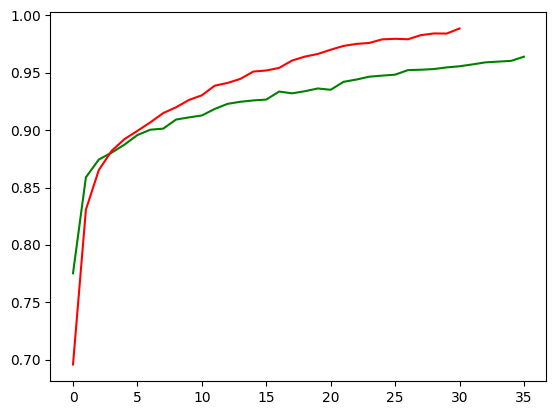

In [19]:
plt.plot(history_model_sequential.history['accuracy'] ,color = 'green')
plt.plot(history_model_sequential_CNN.history['accuracy'] ,color = 'red')

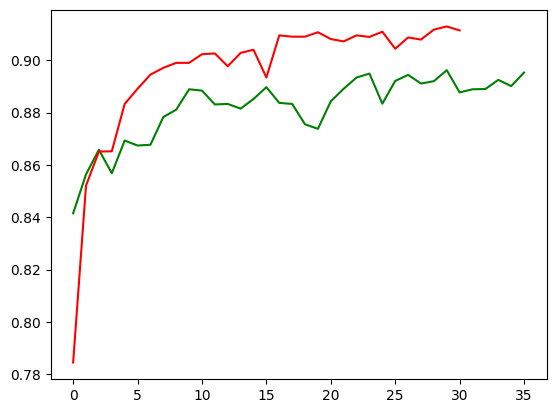

In [20]:
plt.plot(history_model_sequential.history['val_accuracy'] ,color = 'green')
plt.plot(history_model_sequential_CNN.history['val_accuracy'] ,color = 'red')

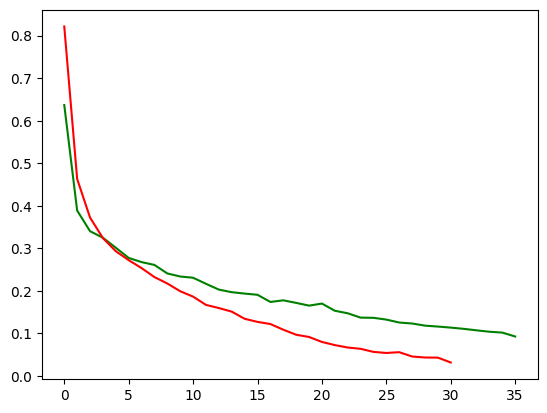

In [21]:
plt.plot(history_model_sequential.history['loss'] ,color = 'green')
plt.plot(history_model_sequential_CNN.history['loss'] ,color = 'red')